Using TensorFlow backend.


[[135. 190. 229. ... -83. -51.   4.]
 [386. 382. 356. ... 143. 129.   1.]
 [-32. -39. -47. ... -35. -36.   5.]
 ...
 [ 14.   6. -13. ...  -1.  -8.   5.]
 [-40. -25.  -9. ...  59.  55.   3.]
 [ 29.  41.  57. ...   2.  20.   4.]]
[[ 135.  190.  229. ... -127. -116.  -83.]
 [ 386.  382.  356. ...  156.  154.  143.]
 [ -32.  -39.  -47. ...  -30.  -35.  -35.]
 ...
 [  14.    6.  -13. ...  -30.   -2.   -1.]
 [ -40.  -25.   -9. ...   86.   68.   59.]
 [  29.   41.   57. ...    4.   -2.    2.]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 168, 60)           660       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 159, 60)           36060     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 79, 60)            0         
______________________________________________

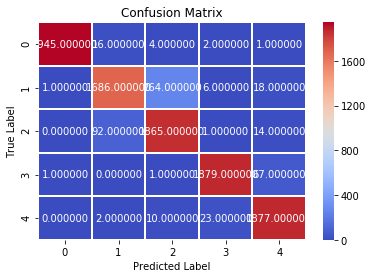


--- evaluate the model ---

1725/1725 [==============================] - 0s 183us/step
Test score: 0.5883938739265221
Test accuracy: 0.8098550729129625
Confusion matrix:
 [[317   9   5   1   0]
 [  2 186 125   1  11]
 [  0  53 260   1  14]
 [  0   0   0 291  61]
 [  0   2  15  28 343]]
sensitivity 16.0
specificity 3.0
sensitivity 140.0
specificity 65.0
sensitivity 69.0
specificity 146.0
sensitivity 62.0
specificity 32.0
sensitivity 46.0
specificity 87.0
[{'Class': 0, 'TP': 317, 'FN': 15.0, 'FP': 2.0, 'TN': 1391.0}, {'Class': 1, 'TP': 186, 'FN': 139.0, 'FP': 64.0, 'TN': 1336.0}, {'Class': 2, 'TP': 260, 'FN': 68.0, 'FP': 145.0, 'TN': 1252.0}, {'Class': 3, 'TP': 291, 'FN': 61.0, 'FP': 31.0, 'TN': 1342.0}, {'Class': 4, 'TP': 343, 'FN': 45.0, 'FP': 86.0, 'TN': 1251.0}]


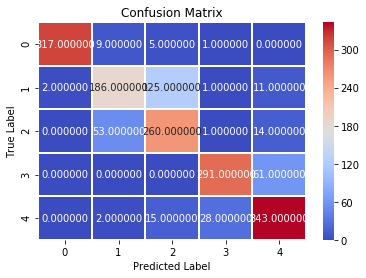


--- Learning curve of model training ---



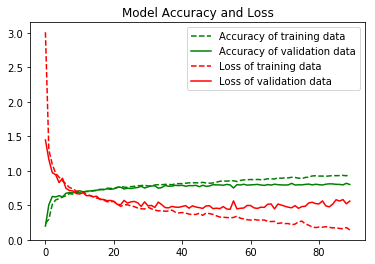

In [1]:
import sys
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from numpy.random import seed
from tensorflow import set_random_seed
import scipy as sp
import scipy.io as spio
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
%matplotlib inline
from tensorflow.python import keras
from sklearn.model_selection import train_test_split ,KFold
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import np_utils

from numpy import mean
from scipy.stats import zscore
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from numpy import mean

from scipy import stats
from scipy.stats import zscore
from keras.constraints import max_norm
from sklearn.preprocessing import MinMaxScaler
from keras.layers.normalization import BatchNormalization

dataset = np.loadtxt("datalast.csv",delimiter=",")
print(dataset)



X = dataset[:,0:177]
y = dataset[:,178]

dataset= stats.zscore(dataset)
scaler = MinMaxScaler(feature_range=(-1,1))
dataset = scaler.fit_transform(dataset)
print(X)


LABELS = ["0",

          "1",

          "2",

          "3",

          "4"]

 

def show_confusion_matrix(validations, predictions,normalize=True):
 

    #matrix = metrics.confusion_matrix(y_test_hot, predictions)
    plt.figure(figsize=(6, 4))

    sns.heatmap(c,

                cmap="coolwarm",

                linecolor='white',

                linewidths=1,

                xticklabels=LABELS,

                yticklabels=LABELS,

                annot=True,

                fmt="f")

    plt.title("Confusion Matrix")

    plt.ylabel("True Label")

    plt.xlabel("Predicted Label")

    plt.show()
    
def counts_from_confusion(confusion):

    counts_list=[]
    
# Iterate through classes and store the counts

    for i in range(confusion.shape[0]):

        tp = confusion[i, i]
        
        fn_mask = np.zeros(confusion.shape)

        fn_mask[i, :] = 1

        fn_mask[i, i] = 0

        fn = np.sum(np.multiply(confusion, fn_mask))



        fp_mask = np.zeros(confusion.shape)

        fp_mask[:, i] = 1

        fp_mask[i, i] = 0

        fp = np.sum(np.multiply(confusion, fp_mask))
        
        tn_mask = 1 - (fn_mask + fp_mask)

        tn_mask[i, i] = 0

        tn = np.sum(np.multiply(confusion, tn_mask))



        counts_list.append({'Class': i,

                           'TP': tp,
   
                           'FN': fn,

                           'FP': fp,

                           'TN': tn})
        #sen = tp / tp + fn
         
        print('sensitivity', tp / tp + fn )

        print('specificity', tn / tn + fp) 

    return counts_list


"""
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(177,1)))
model.add(Conv1D(32, kernel_size=3 , activation='relu',padding='same'))
model.add(MaxPooling1D(2,strides=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, kernel_size= 3, activation='relu'))
#model.add (BatchNormalization())
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(5, activation='softmax'))
"""
"""
model= Sequential()
model.add(Conv1D(4, 6, strides=1,input_shape=(177,1)))
model.add(Conv1D(4, 6, strides=1, padding='same'))
model.add(MaxPooling1D(4, strides=2))
model.add(Conv1D(4, 5, strides=1, padding='same'))
model.add(Conv1D(4, 5, strides=1, padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(4, strides=2))
#model.add(Dropout(0.15))

model.add(Conv1D(10, 4,strides=1 , padding='same'))
#model.add(Conv1D(10, 4,strides=1 , padding='same'))

model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(10, strides=2))
#model.add(Dropout(0.15))


model.add(Conv1D(10, 4, strides=1 , padding='same'))
#model.add(Conv1D(10, 4, strides=1 , padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(10, strides=2))
#model.add(Dropout(0.15))

model.add(Conv1D(15, 4, strides=1 , padding='same'))
#model.add(Conv1D(15, 4, strides=1 , padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(15, strides=2 , padding='same'))
#model.add(Dropout(0.15))

model.add(GlobalAveragePooling1D())
model.add(Dropout(0.15))
model.add(Dense (50))
model.add(Dense (20))
model.add(Dense (5,activation='softmax'))
print(model.summary())
"""

"""
model = Sequential()
model.add(Conv1D(10, 10, activation='relu', input_shape=(177,1), kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(Conv1D(10, 10, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
#model.add(Conv2D(32, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.15))
model.add(Conv1D(60, 10, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(Conv1D(60, 10, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.15))
model.add(Conv1D(50, 5, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.15))
model.add(Dense(5, activation='softmax', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
"""

model = Sequential()
model.add(Conv1D(60, 10, activation='relu', input_shape=(177,1)))
model.add(Conv1D(60, 10, activation='relu'))
#model.add(Conv1D(60, 10, activation='relu',   padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Conv1D(100, 10, activation='relu'))
model.add(Conv1D(100, 10, activation='relu'))
#model.add(Conv1D(100, 10, activation='relu' , padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Conv1D(50, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
#model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax' , ))
print(model.summary())

# The EarlyStopping callback monitors training accuracy:
# if it fails to improve for two consecutive epochs,
# training stops early

"""
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
"""



cvscores = []


scores = list()
# summarize scores
#def summarize_results(scores):
#  m, s = mean(scores), std(scores)
 #print('Accuracy: %.3f%%(+/-%.3f)' % (m ,s) )


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.70, random_state=0)

print("\n--- Reshape data to be accepted by Keras ---\n")
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
y_train = y_train.reshape(y_train.shape[0],1)
y_train_hot = np_utils.to_categorical(y_train-1, 5) # subtracting y_train-1 as keras starts num_Classes index from 0 and we had it from 1 to 5
print(X_train.shape)
print(y_train_hot.shape)



# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
print("\n--- Fit the model ---\n")
history = model.fit(X_train, y_train_hot, batch_size =400, epochs=120 ,
                    #callbacks=callbacks_list,
                    validation_split=0.15, verbose=1)

predictions = model.predict(X_train)

y_train_hot = np.argmax(y_train_hot, axis=-1)

predictions = np.argmax(predictions, axis=-1)
#c = c.astype('float') / c.sum(axis=1)[:, np.newaxis]

c = confusion_matrix(y_train_hot, predictions)

print('Confusion matrix:\n', c)
print(counts_from_confusion(c))
show_confusion_matrix(y_train_hot, predictions)
    
    
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = y_test.reshape(y_test.shape[0],1)

y_test_hot = np_utils.to_categorical(y_test-1, 5)

# evaluate the model
print("\n--- evaluate the model ---\n")
score, acc = model.evaluate(X_test, y_test_hot,verbose=1)

print('Test score:', score)
print('Test accuracy:', acc)

predictions = model.predict(X_test)

y_test_hot = np.argmax(y_test_hot, axis=-1)

predictions = np.argmax(predictions, axis=-1)
#c = c.astype('float') / c.sum(axis=1)[:, np.newaxis]

c = confusion_matrix(y_test_hot, predictions)

print('Confusion matrix:\n', c)
print(counts_from_confusion(c))
show_confusion_matrix(y_test_hot, predictions)

print("\n--- Learning curve of model training ---\n")
plt.figure()
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")

plt.title('Model Accuracy and Loss')
plt.legend()
plt.show()

#cvscores.append(scores * 100)
#print("Avarage accuracy :" , scores )